# 0. Simulate real signal data

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

%matplotlib inline
%config InlineBackend.figure_format='retina'

#Just to filter out warnings- Well I hate warnings popping on the screen 
import warnings
warnings.filterwarnings("ignore")

## 0.1 Pure signal data

Text(0, 0.5, 'amplitude')

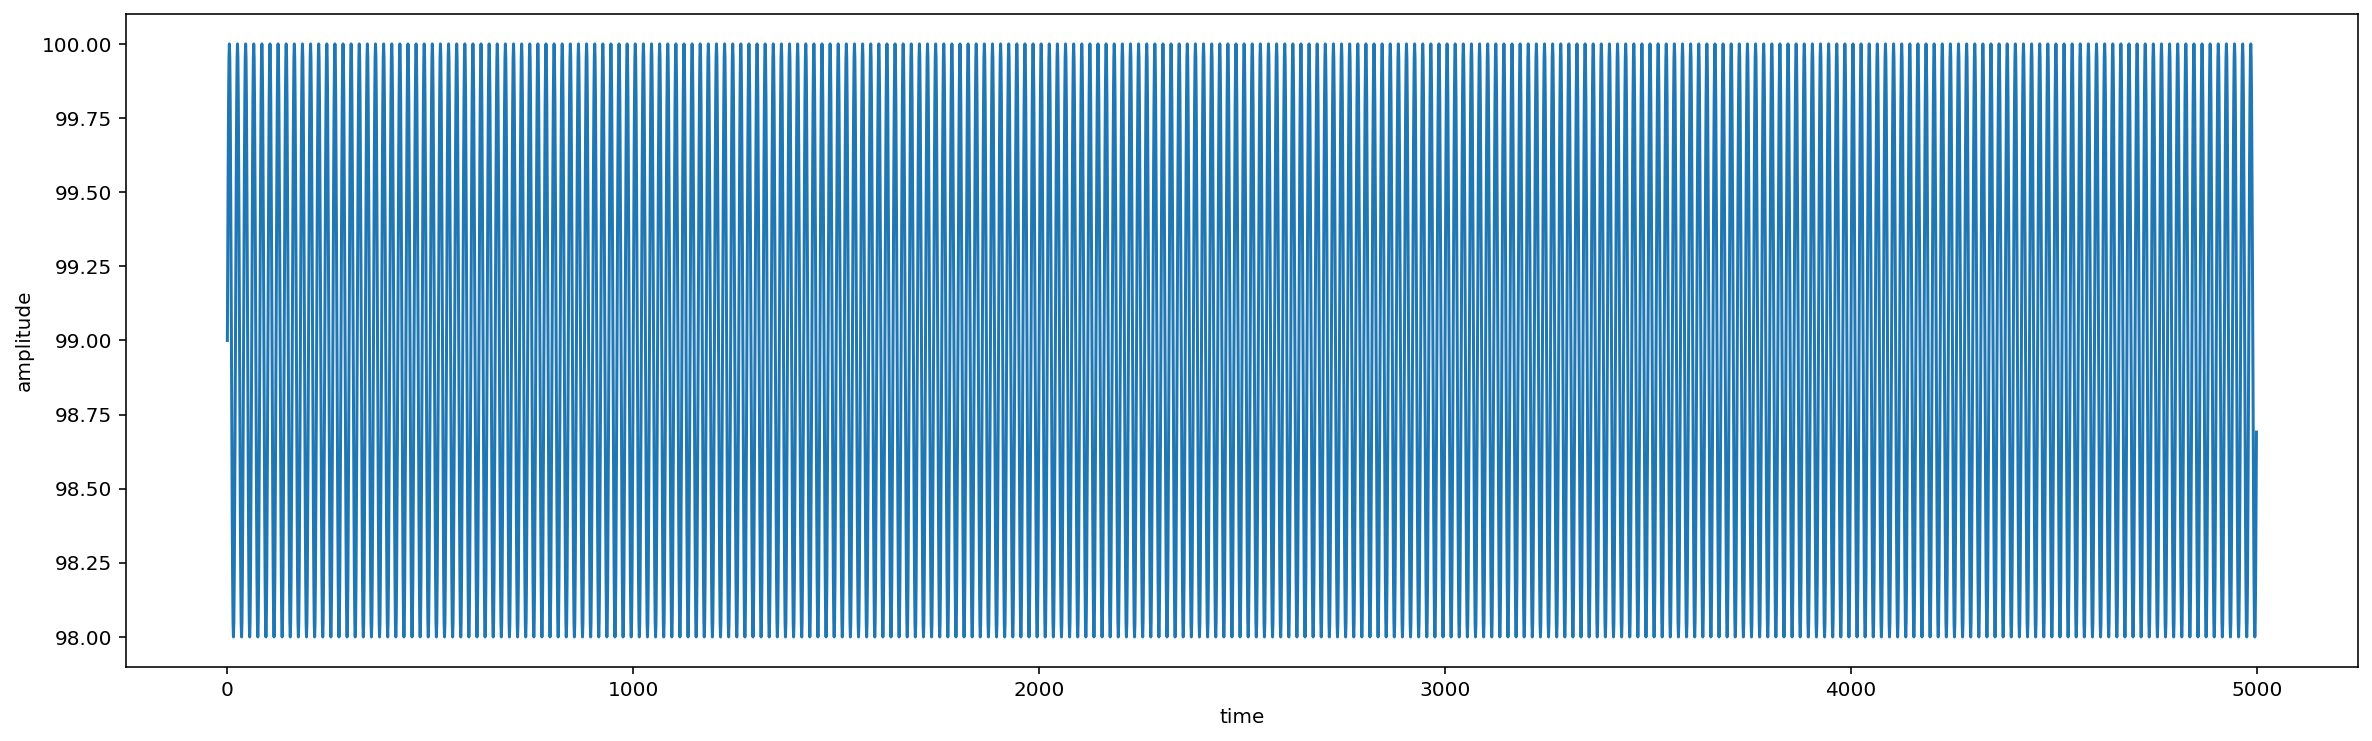

In [3]:
# define parameters
time=5000
x =np.arange(time)
freq = 10

# sine wave
ps=np.sin(2*np.pi*freq*(x/200))+99

plt.figure(figsize=(20,6))
plt.plot(x,ps)
plt.xlabel('time')
plt.ylabel('amplitude')

## 0.2 Noise form

Text(0, 0.5, 'amplitude')

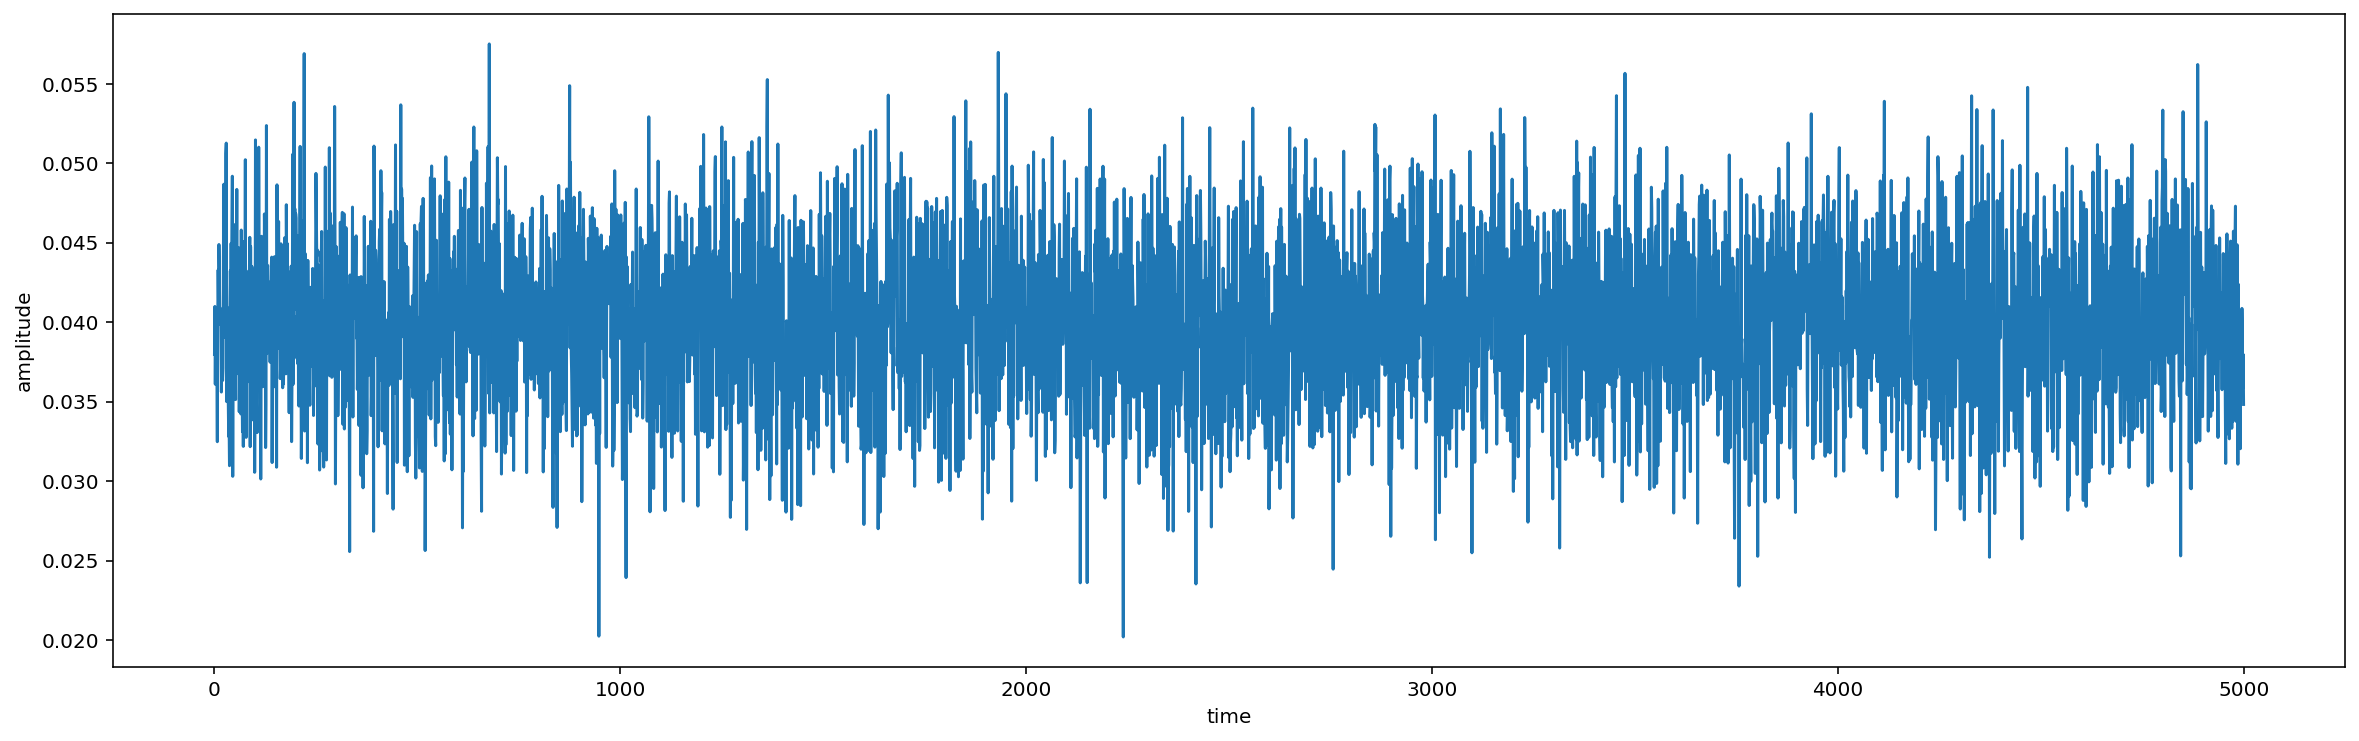

In [4]:
#rd=np.random.normal(size=time,)
#nf=(np.max(rd)-rd)/100
nf=np.random.normal(.04,.005,time)

plt.figure(figsize=(20,6))
plt.plot(nf)
plt.xlabel('time')
plt.ylabel('amplitude')

## 0.3 Atmos signal data  = Pure + Noise

Text(0, 0.5, 'amplitude')

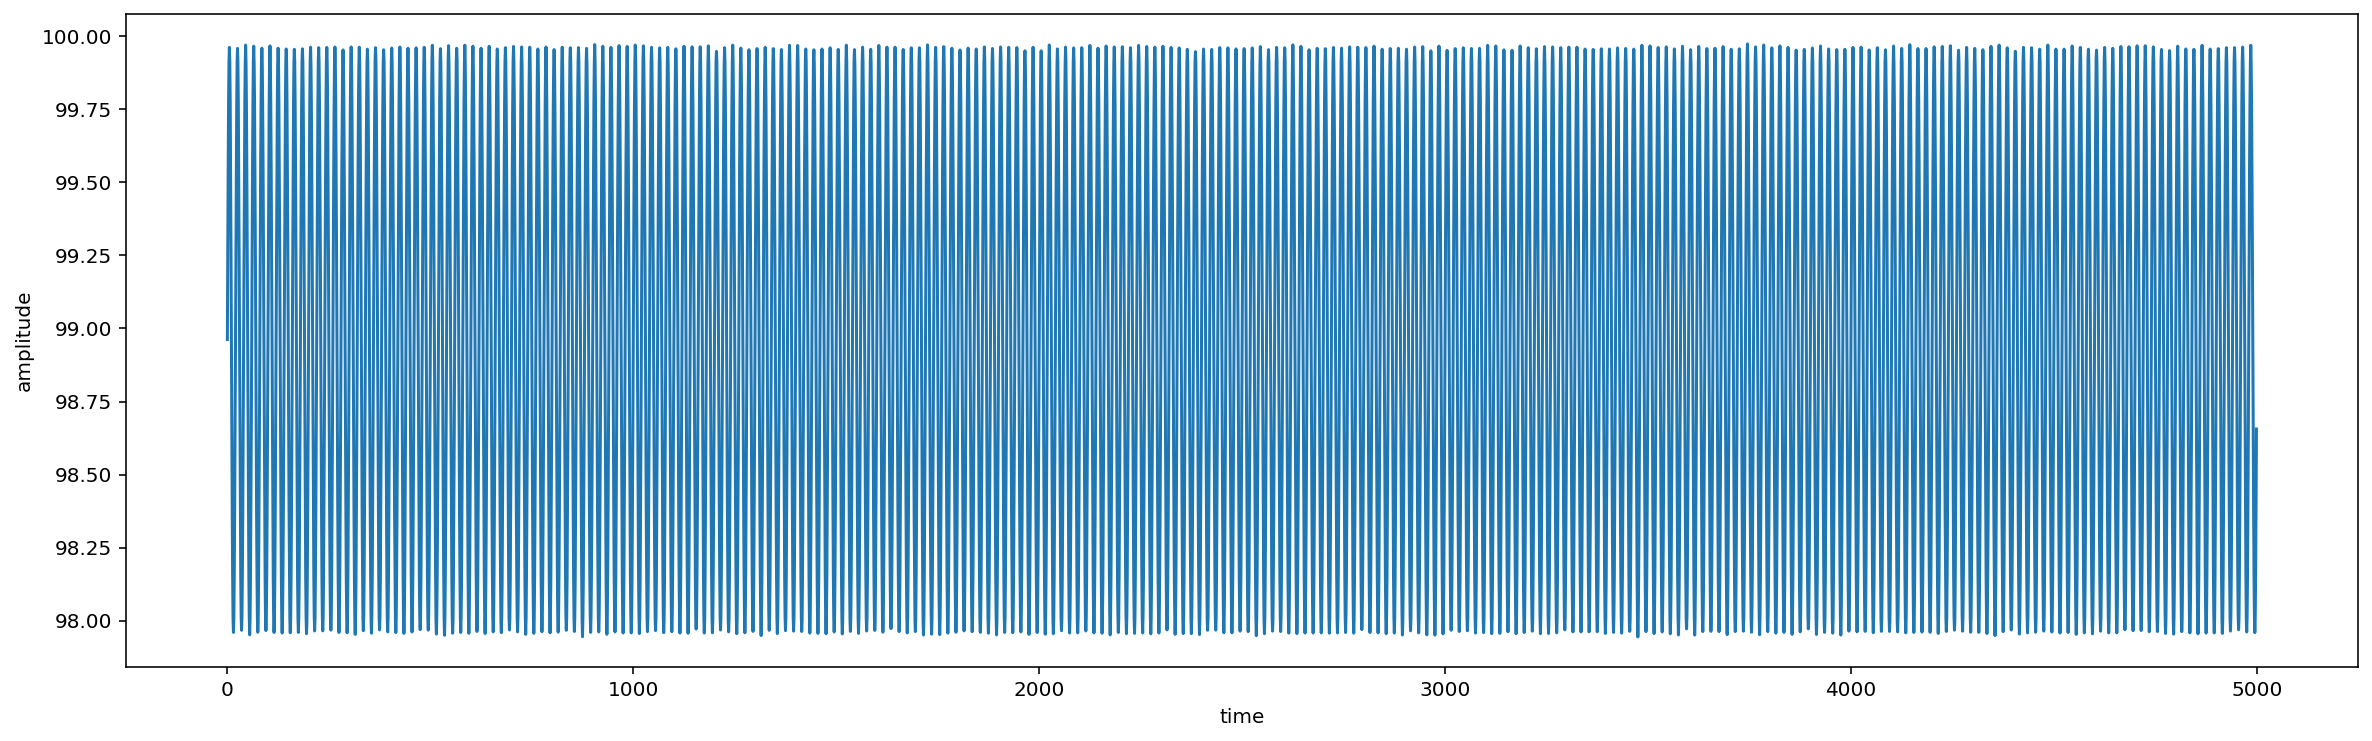

In [5]:
at = -nf+ps

plt.figure(figsize=(20,6))
plt.plot(x,at)
plt.xlabel('time')
plt.ylabel('amplitude')

(0, 100)

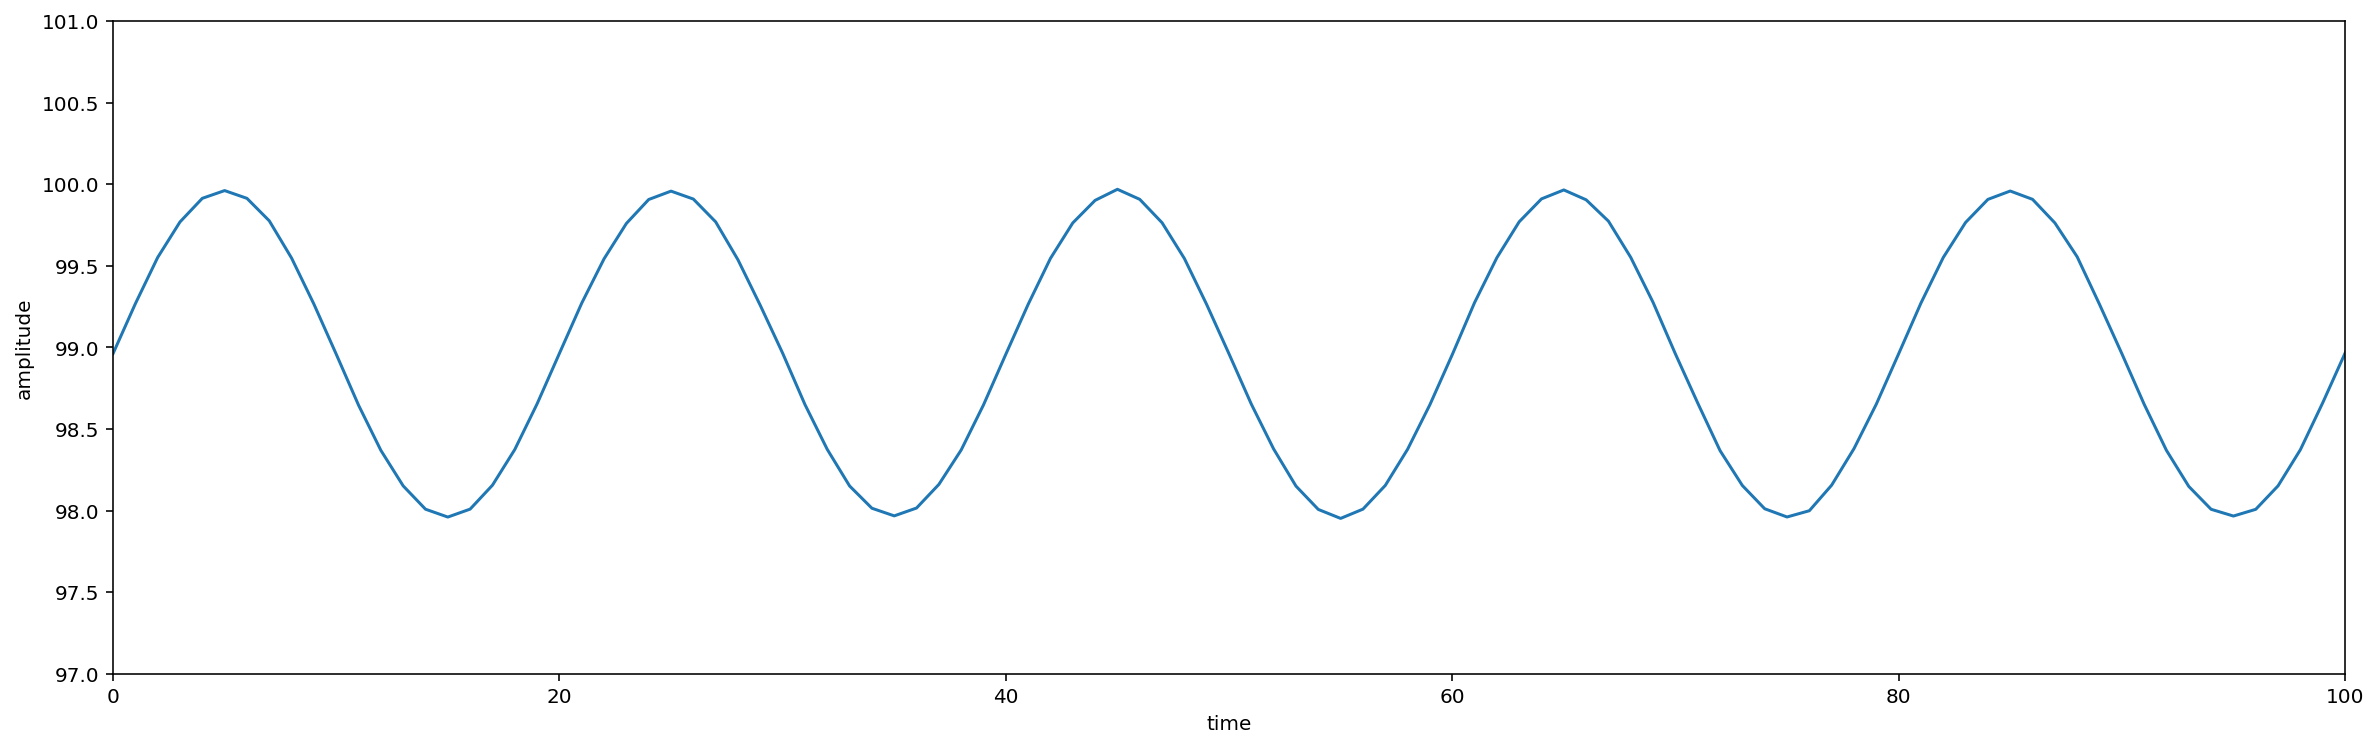

In [6]:
plt.figure(figsize=(20,6))
plt.plot(x,at)
plt.xlabel('time')
plt.ylabel('amplitude')

plt.ylim(97,101)
plt.xlim(0,100)

## 0.4 Lose form

In [7]:
#parameters
sigma=50 #50
mu=100 #100
sizeLoss=10000 #10000
#time parameter
x=np.arange(-(time-(time-mu)),(time-mu))
#x=np.arange(-100,10000)
#print(x.size)

#gausian distribution
#ga=((1/np.sqrt(2*np.pi*sigma**2))*np.exp(-(x-mu)**2/(2*sigma**2)))
gau=-((1/np.sqrt(2*np.pi*sigma**2))*np.exp((-(x-mu)**2)/(2*sigma**2)))*sizeLoss
print(gau)
print(x)

[-0.02676605 -0.02898951 -0.03138513 ... -0.         -0.
 -0.        ]
[-100  -99  -98 ... 4897 4898 4899]


Text(0, 0.5, 'loss signal data')

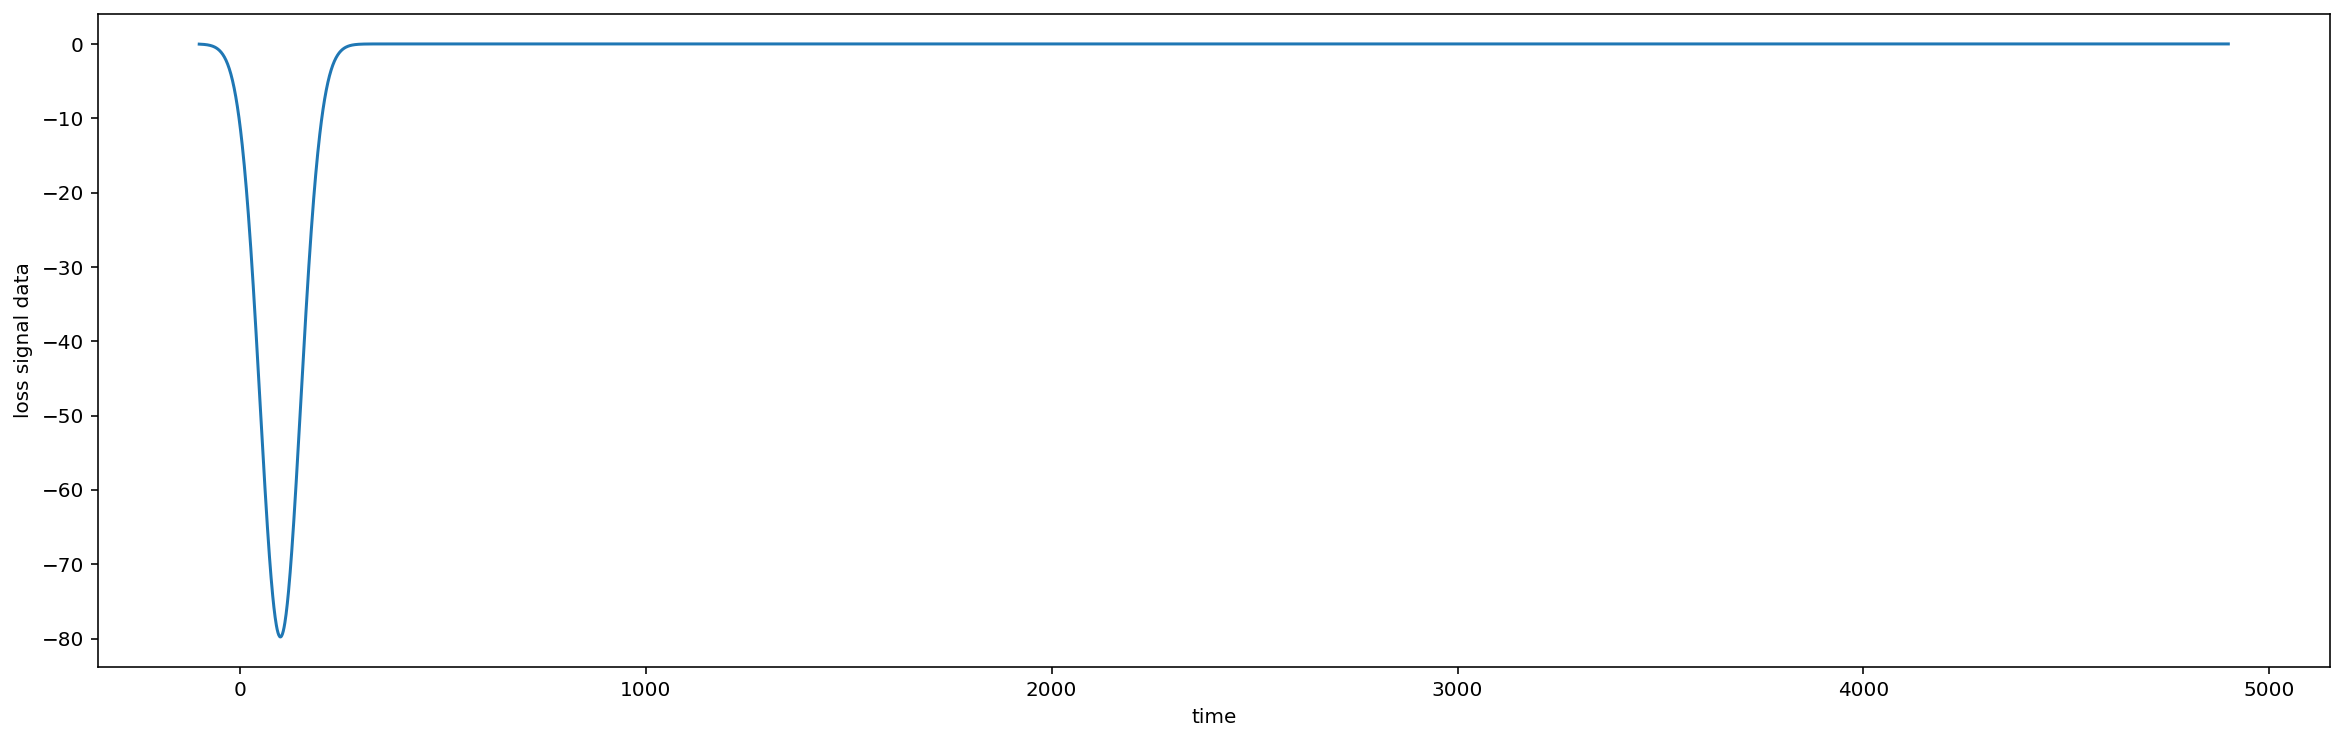

In [8]:
plt.figure(figsize=(20,6))
plt.plot(x,gau)
plt.xlabel('time')
plt.ylabel('loss signal data')

# 0.5 Real signal data

Text(0, 0.5, 'loss signal data')

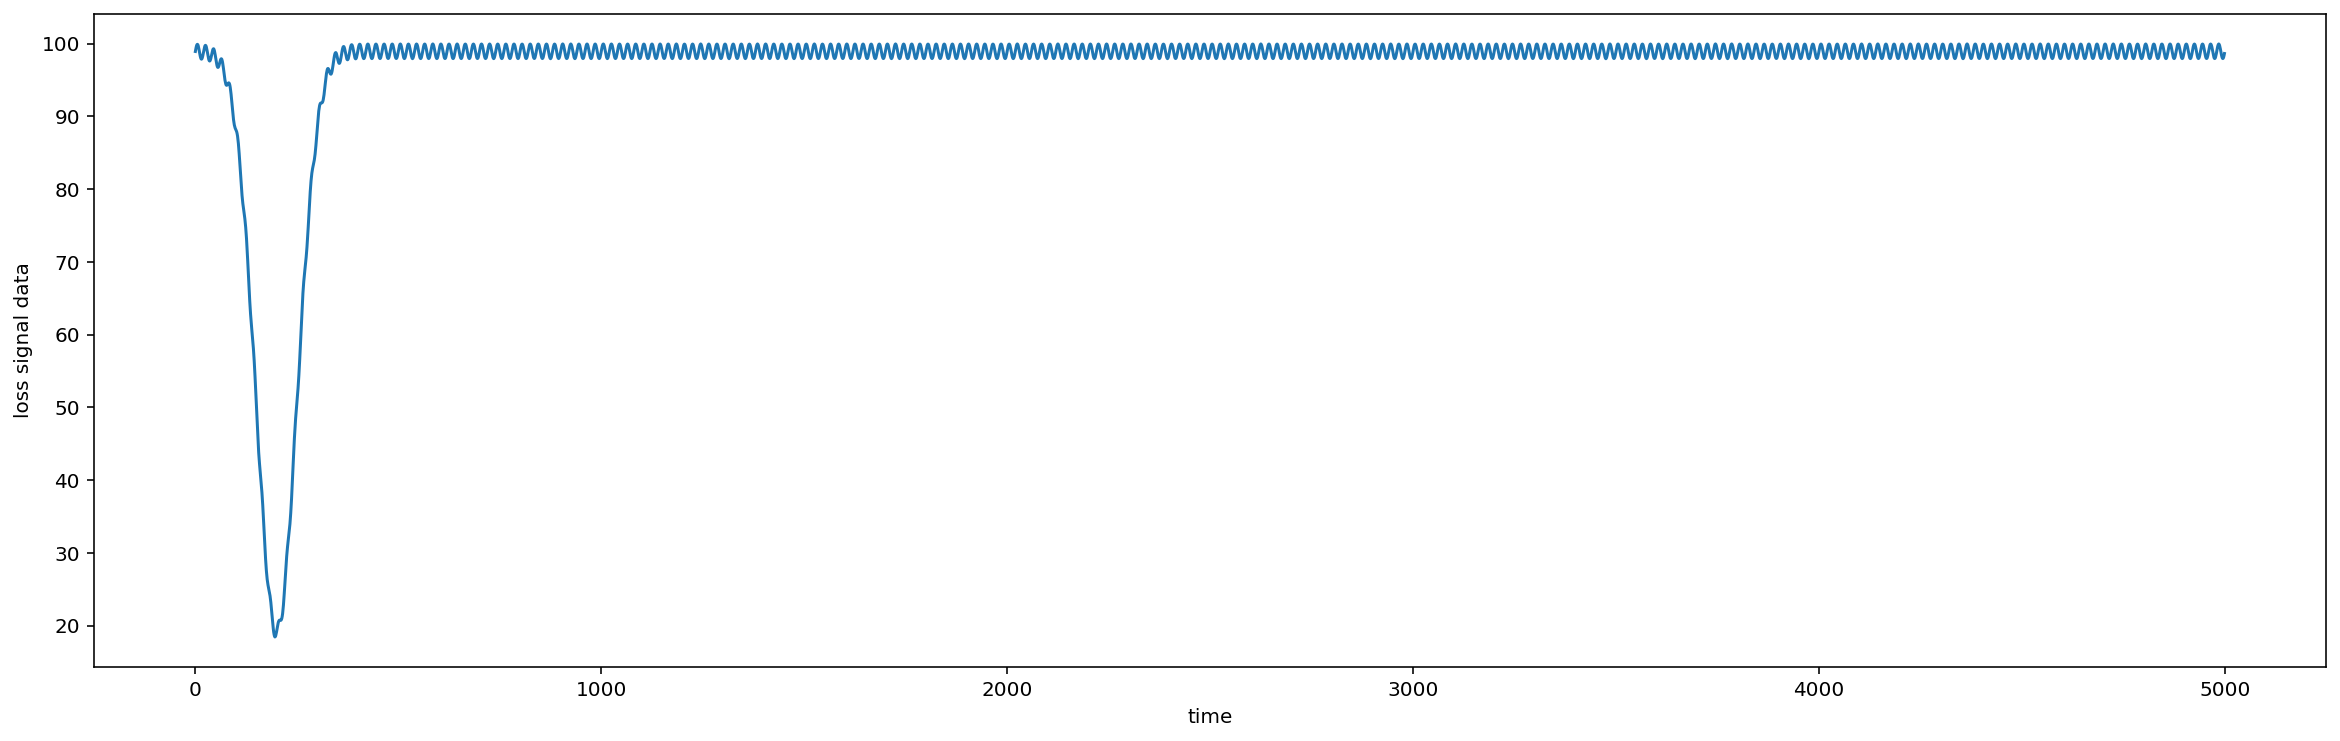

In [9]:
real=at+gau

plt.figure(figsize=(20,6))
plt.plot(real)
plt.xlabel('time')
plt.ylabel('loss signal data')

In [10]:
np.max(real)

99.97358281841797

# 1. Statistical analysis of the signal

## 1.1 Atmos signal data

Text(0, 0.5, 'amplitude')

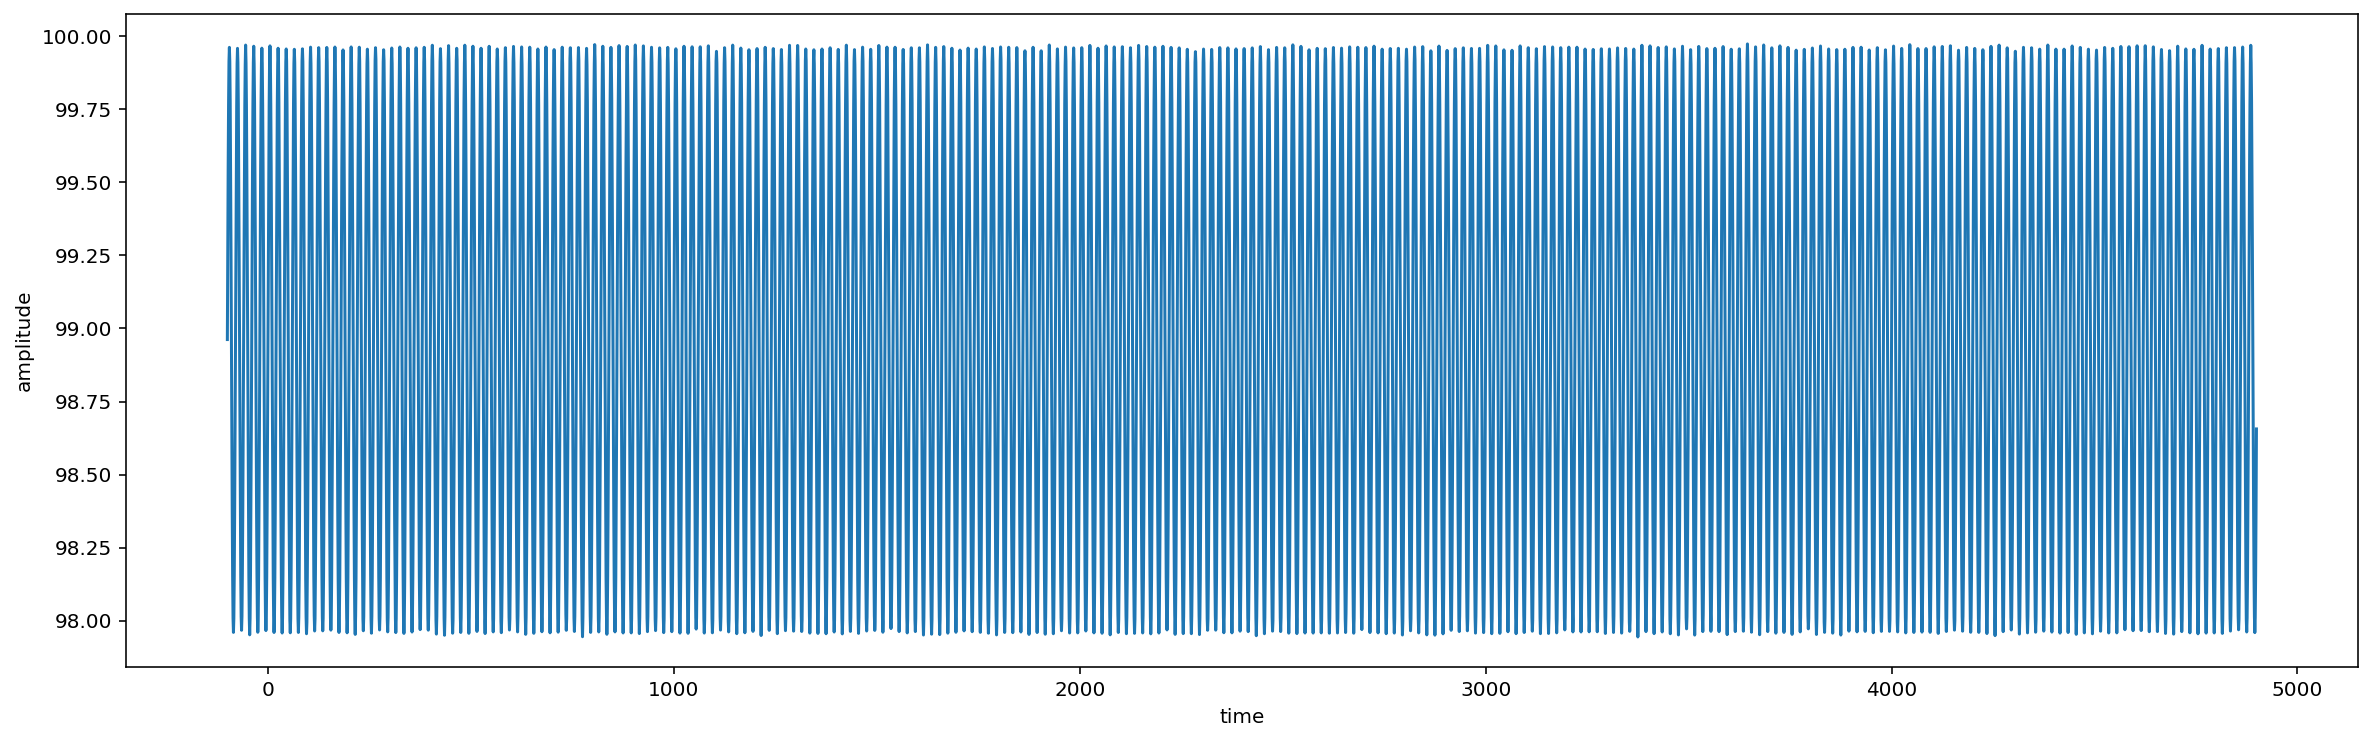

In [11]:
plt.figure(figsize=(20,6))
plt.plot(x,at)
plt.xlabel('time')
plt.ylabel('amplitude')

In [12]:
at_max=np.max(at)
at_mean=np.mean(at)
at_min=np.min(at)
at_std=np.std(at)

print('Max of Atmo = '+ str(at_max))
print('Mean of Atmo = '+ str(at_mean))
print('Min of Atmo = '+ str(at_min))
print('Std of Atmo = '+ str(at_std))

Max of Atmo = 99.97358281841797
Mean of Atmo = 98.95995759445867
Min of Atmo = 97.94433299788321
Std of Atmo = 0.7071811362596988


# 1.2 Real signal data

Text(0, 0.5, 'loss signal data')

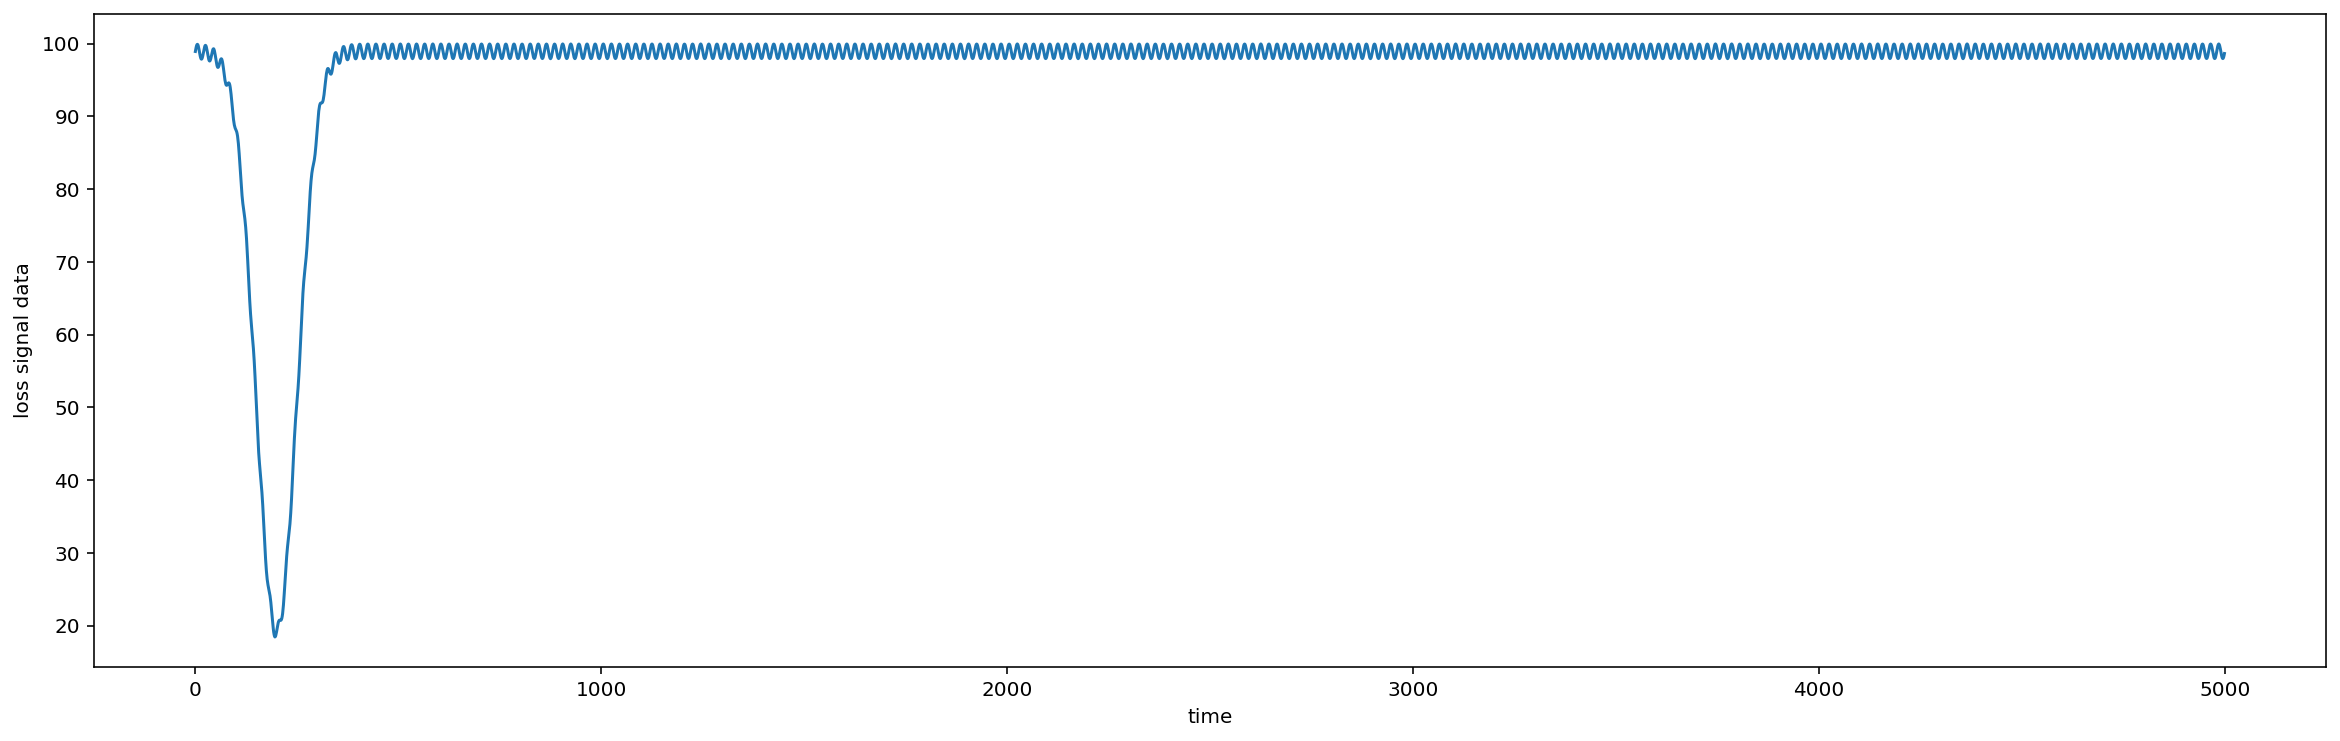

In [13]:
plt.figure(figsize=(20,6))
plt.plot(real)
plt.xlabel('time')
plt.ylabel('real signal data')

In [14]:
real_max=np.max(real)
real_mean=np.mean(real)
real_min=np.min(real)
real_std=np.std(real)

print('Max of Real signal = '+ str(real_max))
print('Mean of Real signal = '+ str(real_mean))
print('Min of Real signal = '+ str(real_min))
print('Std of Real signal = '+ str(real_std))

Max of Real signal = 99.97358281841797
Mean of Real signal = 96.96001829602278
Min of Real signal = 18.461557919485358
Std of Real signal = 10.456584603586705


# 1.3 Comparing by Graph

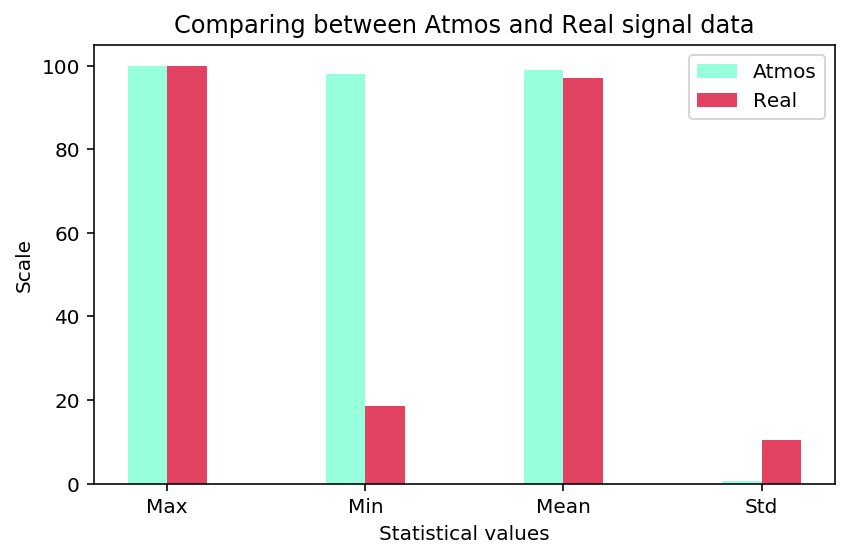

In [15]:
labels=('Max','Min','Mean','Std')
data_at=[at_max, at_min, at_mean, at_std]
data_real=[real_max, real_min, real_mean, real_std]
n_group=4


fig, ax = plt.subplots()
index=np.arange(n_group)
bar_width=.2
opacity=.8

rects1=plt.bar(index, data_at, bar_width, alpha=opacity, color='aquamarine', label='Atmos')
rects2=plt.bar(index+bar_width, data_real, bar_width, alpha=opacity, color='crimson', label='Real')

plt.xlabel('Statistical values')
plt.ylabel('Scale')
plt.title('Comparing between Atmos and Real signal data')
plt.xticks(index+bar_width-.1, labels)
plt.legend()

plt.tight_layout()
plt.show()

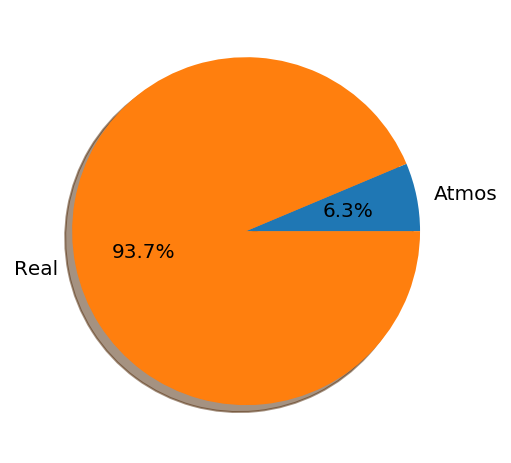

In [16]:
plt.pie([at_std,real_std],labels=['Atmos','Real'],shadow=True, autopct = '%1.1f%%')
plt.show()

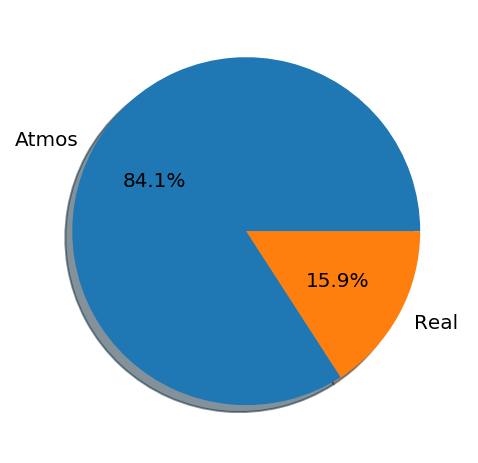

In [17]:
plt.pie([at_min,real_min],labels=['Atmos','Real'],shadow=True, autopct = '%1.1f%%')
 
plt.show()

# 1.4 Distribution

In [18]:
import seaborn as sns

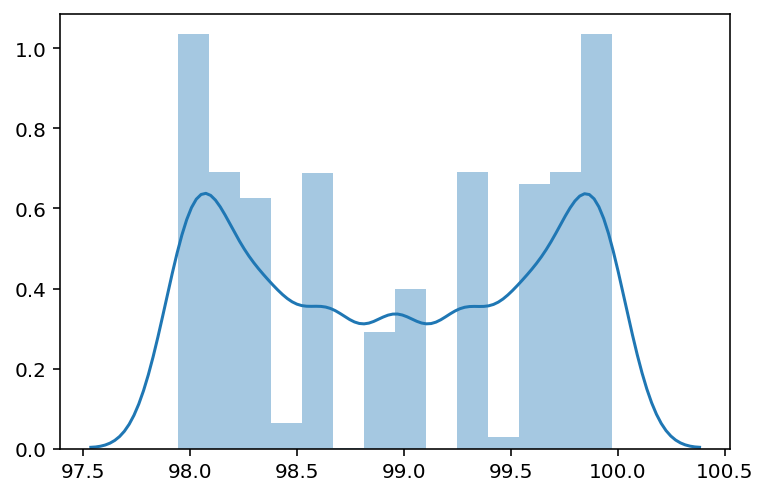

In [19]:
sns.distplot(at)

In [20]:
from scipy.stats import skew , kurtosis
print('Skewness =' +str(skew(at)))
print('Kurtosis =' +str(kurtosis(at)))

Skewness =0.0002929528962170994
Kurtosis =-1.4994265946963161


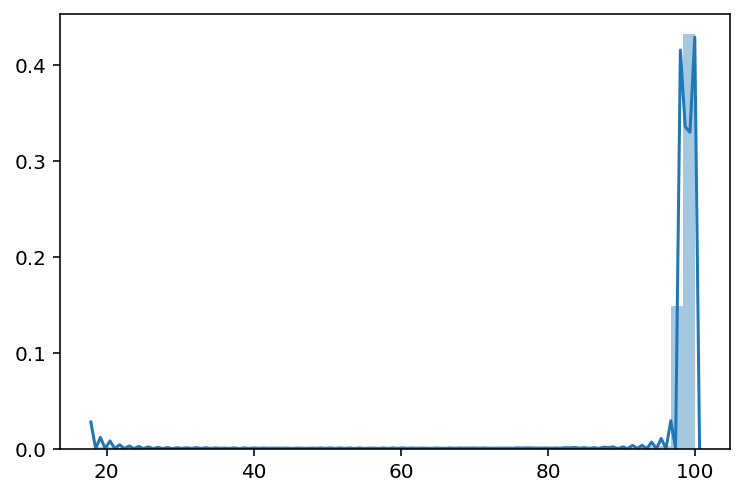

In [21]:
sns.distplot(real)

In [22]:
print('Skewness =' +str(skew(real)))
print('Kurtosis =' +str(kurtosis(real)))

Skewness =-5.851568361723251
Kurtosis =34.8200685857835


# 2. Machine learning

### prepare datasets 2 D

In [23]:
real_train=np.array([real,real]).T

In [24]:
real_train.shape

(5000, 2)

## 2.1 Isolation Forest

In [59]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(random_state=0, contamination=0.05)
clf.fit(real_train)

y_train=clf.predict(real_train)

C:\Users\parinya.dua\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


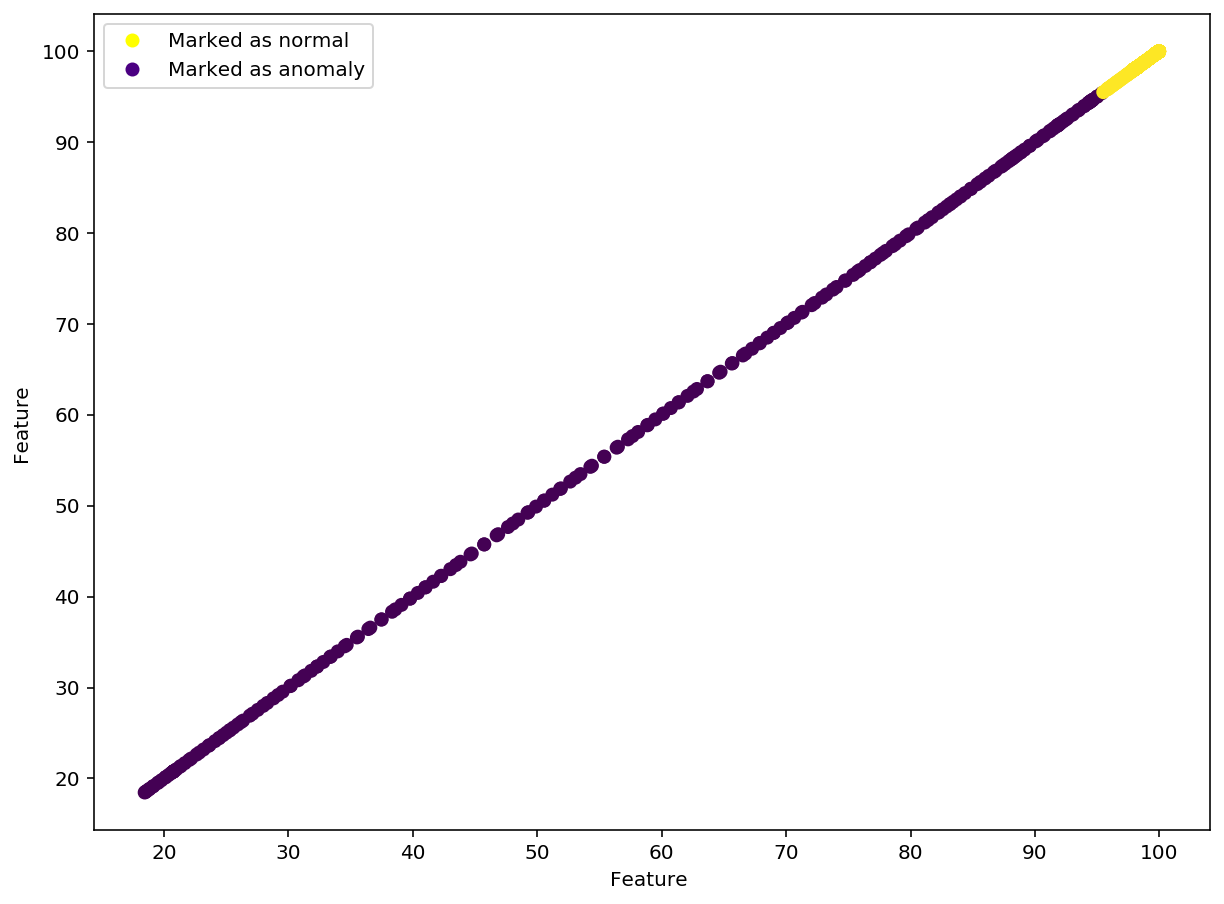

In [60]:

#Now we will plot and visualize how good our algorithm works for training data
#y_train(the state) will mark the colors accordingly
plt.figure(figsize=(10,7.5))
plt.scatter(real_train[:,0],real_train[:,1],c=y_train)
plt.xlabel('Feature ')
plt.ylabel('Feature ')

 
#This is to set the legend appropriately
from matplotlib.lines import Line2D

legend_elements = [Line2D([], [], marker='o', color='yellow', label='Marked as normal',linestyle='None'),
                   Line2D([], [], marker='o', color='indigo', label='Marked as anomaly', linestyle='None')]
plt.legend(handles=legend_elements)

In [62]:
pd_y_train=pd.Series(y_train)
pd_y_train

0       1
1       1
2       1
3       1
4       1
       ..
4995    1
4996    1
4997    1
4998    1
4999    1
Length: 5000, dtype: int32

In [63]:
pd_y_train[100]

-1

TypeError: 'Series' object is not callable

In [68]:
out_index=np.argwhere(y_train==-1)
out_index

array([[ 72],
       [ 73],
       [ 74],
       [ 75],
       [ 76],
       [ 77],
       [ 78],
       [ 79],
       [ 80],
       [ 81],
       [ 82],
       [ 83],
       [ 84],
       [ 85],
       [ 86],
       [ 87],
       [ 88],
       [ 89],
       [ 90],
       [ 91],
       [ 92],
       [ 93],
       [ 94],
       [ 95],
       [ 96],
       [ 97],
       [ 98],
       [ 99],
       [100],
       [101],
       [102],
       [103],
       [104],
       [105],
       [106],
       [107],
       [108],
       [109],
       [110],
       [111],
       [112],
       [113],
       [114],
       [115],
       [116],
       [117],
       [118],
       [119],
       [120],
       [121],
       [122],
       [123],
       [124],
       [125],
       [126],
       [127],
       [128],
       [129],
       [130],
       [131],
       [132],
       [133],
       [134],
       [135],
       [136],
       [137],
       [138],
       [139],
       [140],
       [141],
       [142],
      

Text(0, 0.5, 'loss signal data')

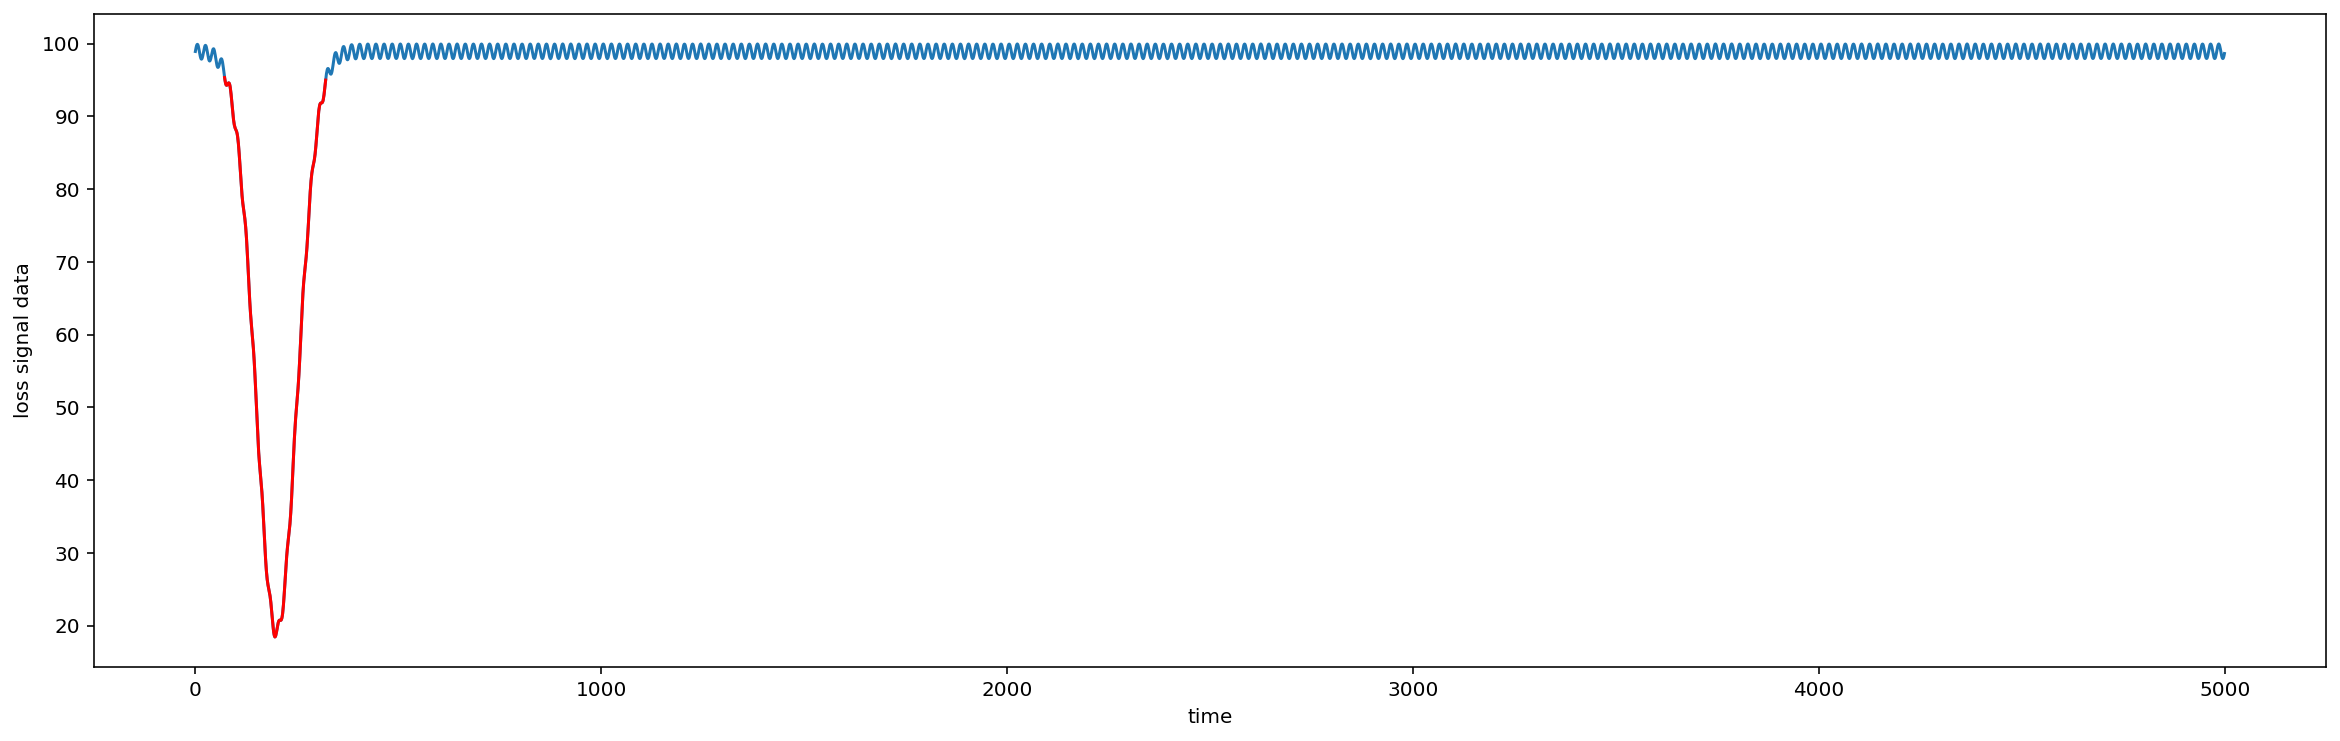

In [75]:
plt.figure(figsize=(20,6))
plt.plot(real)
plt.plot(out_index,real[out_index],color='r')
plt.xlabel('time')
plt.ylabel('loss signal data')

In [ ]:
re

In [45]:
isolation_forest = IsolationForest(random_state=0, contamination=0.055)
#isolation_forest = IsolationForest(n_estimators=10)
isolation_forest.fit(real_train.reshape(-1, 1))

IsolationForest(behaviour='old', bootstrap=False, contamination=0.055,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=0, verbose=0, warm_start=False)

In [46]:
xx = np.linspace(np.min(real_train), np.max(real_train), len(real_train)).reshape(-1,1)
                 

In [47]:
xx

array([[18.46155792],
       [18.47786359],
       [18.49416925],
       ...,
       [99.94097149],
       [99.95727715],
       [99.97358282]])

In [48]:
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)

C:\Users\parinya.dua\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [49]:
outlier

array([-1, -1, -1, ...,  1,  1,  1])

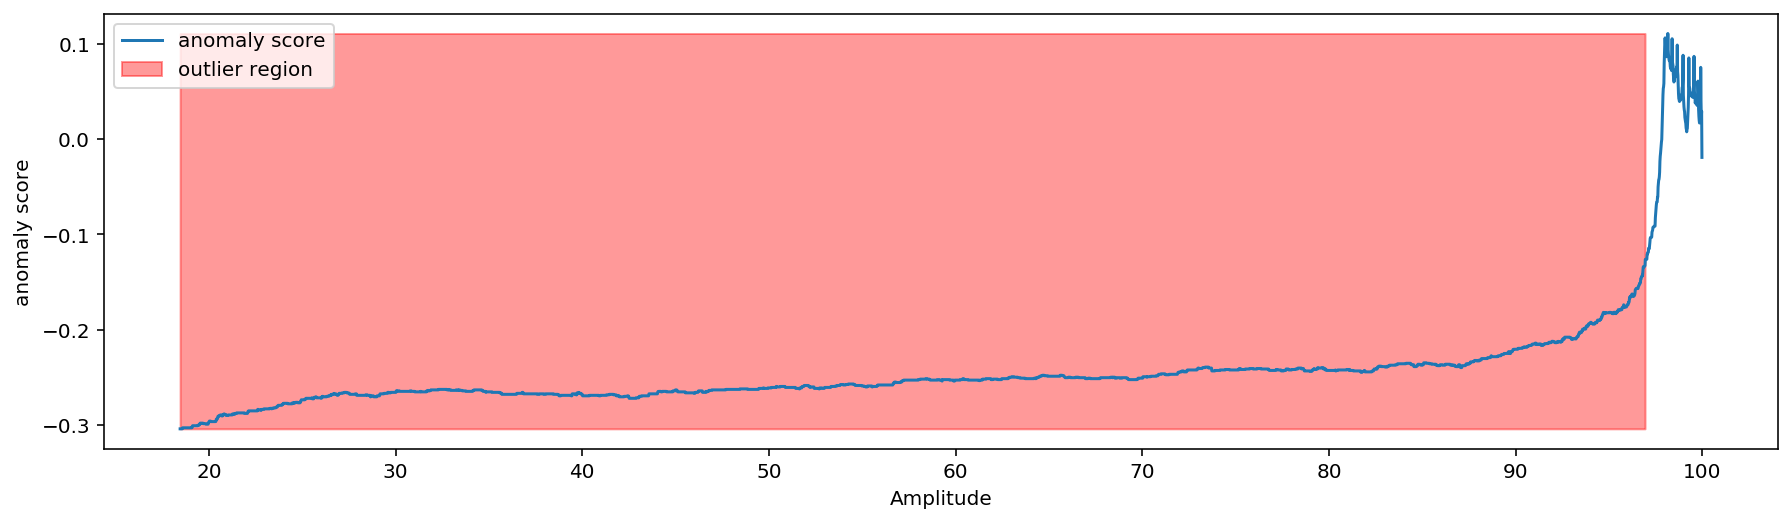

In [50]:
plt.figure(figsize=(15,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Amplitude')
plt.show();

In [33]:
type(outlier)

numpy.ndarray

In [34]:
import pandas as pd
pd_outlier=pd.Series(outlier)

pd_outlier.count()

5000

In [37]:
pd_outlier

0      -1
1      -1
2      -1
3      -1
4      -1
       ..
4995    1
4996    1
4997    1
4998    1
4999    1
Length: 5000, dtype: int32

C:\Users\parinya.dua\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


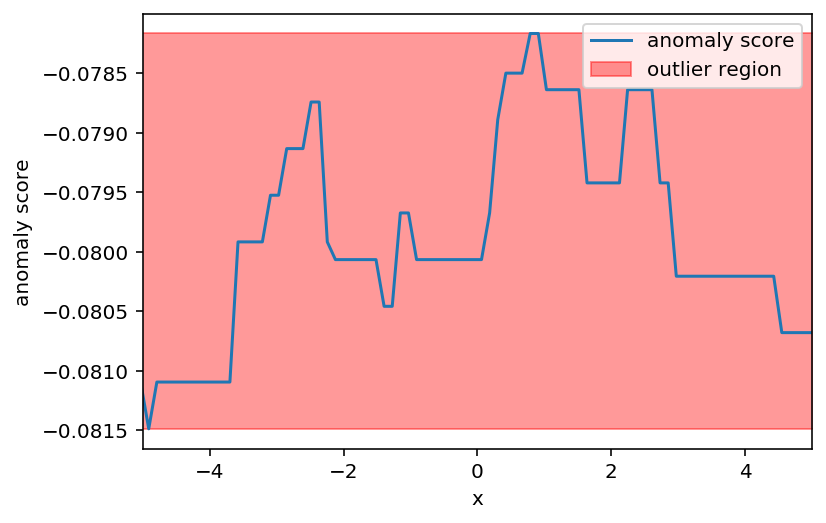

In [35]:
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(x.reshape(-1, 1))
xx = np.linspace(-6, 6, 100).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('x')
plt.xlim([-5, 5])
plt.show()

In [36]:
isolation_forest = IsolationForest(n_estimators=100)

isolation_forest.fit(df['Sales'].values.reshape(-1, 1))
xx = np.linspace(np.min(real), df['Sales'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Sales')
plt.show();

NameError: name 'df' is not defined

In [ ]:
type(real)

In [ ]:
import pandas as pd
pd_real=pd.Series(real)

In [ ]:
pd_real

In [ ]:
type(pd_real)

In [ ]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df['Sales'].values.reshape(-1, 1))
xx = np.linspace(df['Sales'].min(), df['Sales'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Sales')
plt.show();

In [ ]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df['pd_real'].values.reshape(-1, 1))